# PyTorch

### Goal of lesson
- What is PyTorch
- PyTorch vs Tensorflow
- Get started with PyTorch
- Work with image classification

### Resources to PyTorch
- Free book [Deep Learning with PyTorch](https://pytorch.org/assets/deep-learning/Deep-Learning-with-PyTorch.pdf)

### PyTorch and Tensorflow
- PyTorch and Tensorflow are the most popular Deep Learning frameworks
- PyTorch was released in 2016 by Facebook’s AI Research lab
- Tensorflow was released in 2015 by Google Brain team
- They are both sound choices for Deep Learning

### Installing PyToch
- PyTorch is not by default installed

### Look at the datasets
- PyTorch comes with a long list of prepared datasets ([see all here](https://pytorch.org/vision/0.8/datasets.html)).
- We will cover
    - [MNIST](https://en.wikipedia.org/wiki/MNIST_database) A datasets for handwritten digit-recognition.
    - [CIFAR10](https://en.wikipedia.org/wiki/CIFAR-10) A dataset of 32x32 images of 10 classes
- Datasets can be downloaded with **torchvision**

``` Python
from torchvision import datasets

data_path = 'downloads/'
mnist = datasets.MNIST(data_path, train=True, download=True)
```

### Transforming and Normalizing
- Images are PIL
- Need to be transformed to tensor
    - **torchvision** has transformations **transform.ToTensor()**, which turns NumPy arrays and PIL to Tensor
- Then we need to normalize images
    - Need to determine the **mean** value and the **standard deviation**
- Then we can apply nomalization
    - **torchvision** has **transform.Normalize**, which takes **mean** and **standard deviation**

### Training the model
<img src='img/mnist_nn.png' width=600 align='left'>

### Optimize the model
- If we have defined the model as above - we will use the [SGD](https://pytorch.org/docs/stable/optim.html) optimizer.

```Python
train_loader = torch.utils.data.DataLoader(mnist, batch_size=64,
                                           shuffle=True)

optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.NLLLoss()

n_epochs = 10
for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        optimizer.zero_grad()
        
        batch_size = imgs.shape[0]
        output = model(imgs.view(batch_size, -1))
        
        loss = loss_fn(output, labels)
        
        loss.backward()
        
        optimizer.step()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))
```

### Test the model
- Finally we need to test the model

```Python
correct = 0
total = 0
with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
print("Accuracy: %f", correct / total)
```

> #### Programming Notes:
> - Libraries used
>     - [**torch**](https://pytorch.org) open source machine learning framework
>     - [**torchvision**](https://pypi.org/project/torchvision/) image and video datasets and models for torch deep learning
>     - [**matplotlib**](http://matplotlib.org) - visualization with Python ([Lecture on **visualization**](https://youtu.be/htIh8YHh4xs))
> - Functionality and concepts used
>     - [**datasets**](https://pytorch.org/vision/stable/datasets.html) torchvision datasets.
>     - [**ToTensor**](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.ToTensor) turns NumPy arrays and PIL to Tensor
>     - [**Normalize**](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Normalize) Normalize a tensor image with mean and standard deviation
>     - [**Compose**](https://pytorch.org/vision/stable/transforms.html#torchvision.transforms.Compose) Composes several transforms together.
>     - [**DataLoader**](https://pytorch.org/docs/stable/data.html) data loading utiltiy
>     - [**Sequential**](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) provides training and inference features for a model
>     - [**Linear**](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html) Applies a linear transformation to the incoming data
>     - [**ReLU**](https://pytorch.org/docs/stable/generated/torch.nn.ReLU.html) Applies the rectified linear unit function element-wise (a simple function which allows positive values to pass through, whereas negative values are modified to zero)
>     - [**LogSoftmax**](https://pytorch.org/docs/stable/generated/torch.nn.LogSoftmax.html) Applies the **log(Softmax(x))** function to an n-dimensional input Tensor
>     - [**SGD**](https://pytorch.org/docs/stable/generated/torch.optim.SGD.html) Implements stochastic gradient descent
>     - [**NLLLoss**](https://pytorch.org/docs/stable/generated/torch.nn.NLLLoss.html) The negative log likelihood loss

In [ ]:
!pip install torchvision

In [2]:
from torchvision import datasets
from torchvision import transforms
import torch
import torch.nn as nn
from torch import optim
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data_path = 'downloads/'
mnist = datasets.MNIST(data_path, train=True, download=True)
mnist_val = datasets.MNIST(data_path, train=False, download=True)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting downloads/MNIST/raw/train-images-idx3-ubyte.gz to downloads/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting downloads/MNIST/raw/train-labels-idx1-ubyte.gz to downloads/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting downloads/MNIST/raw/t10k-images-idx3-ubyte.gz to downloads/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting downloads/MNIST/raw/t10k-labels-idx1-ubyte.gz to downloads/MNIST/raw



In [4]:
img, label = mnist[1000]

In [6]:
mnist.classes[label]

'0 - zero'

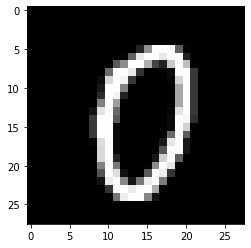

In [7]:
plt.imshow(img, cmap='gray')

In [8]:
mnist = datasets.MNIST(data_path, train=True, download=False, transform=transforms.ToTensor())

In [9]:
imgs = torch.stack([img_t for img_t, _ in mnist], dim=3)

In [10]:
imgs.view(1, -1).mean(dim=1)

tensor([0.1307])

In [12]:
imgs.view(1, -1).std(dim=1)

tensor([0.3081])

In [14]:
mnist = datasets.MNIST(data_path, train=True, download=False, 
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307),
                                               (0.3081))]))

mnist_val = datasets.MNIST(data_path, train=False, download=False, 
                       transform=transforms.Compose([
                           transforms.ToTensor(),
                           transforms.Normalize((0.1307),
                                               (0.3081))]))

In [16]:
input_size = 784 # ?? 28*28
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                     nn.ReLU(),
                     nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                     nn.ReLU(),
                     nn.Linear(hidden_sizes[1], output_size),
                     nn.LogSoftmax(dim=1))

In [18]:
train_loader = torch.utils.data.DataLoader(mnist, batch_size=64,
                                           shuffle=True)

optimizer = optim.SGD(model.parameters(), lr=0.01)
loss_fn = nn.NLLLoss()

n_epochs = 10
for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        optimizer.zero_grad()

        batch_size = imgs.shape[0]
        output = model(imgs.view(batch_size, -1))

        loss = loss_fn(output, labels)

        loss.backward()

        optimizer.step()
    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.398855
Epoch: 1, Loss: 0.338213
Epoch: 2, Loss: 0.269782
Epoch: 3, Loss: 0.042949
Epoch: 4, Loss: 0.189661
Epoch: 5, Loss: 0.259607
Epoch: 6, Loss: 0.086317
Epoch: 7, Loss: 0.046707
Epoch: 8, Loss: 0.037421
Epoch: 9, Loss: 0.120779


In [20]:
val_loader = torch.utils.data.DataLoader(mnist_val, batch_size=64,
                                           shuffle=True)


correct = 0
total = 0
with torch.no_grad():
    for imgs, labels in val_loader:
        batch_size = imgs.shape[0]
        outputs = model(imgs.view(batch_size, -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
print("Accuracy: %f", correct / total)

Accuracy: %f 0.9644
